In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
import matplotlib as mpl
from scipy.optimize import curve_fit
import metpy.calc as mpcalc
from metpy.units import units
import scipy
import metpy
mpl.rcParams['figure.dpi']= 300

In [3]:
c = '/media/rakshith/Seagate Expansion Drive/mraks/MSE India.nc'
ds3 = xr.open_dataset(c)
g = 9.80616
Cp = 1004.64
Lv = 2.501e6
R = 8.34

f1 = netCDF4.Dataset(c)

lon_grid1, lat_grid1 = np.meshgrid(ds3.longitude, ds3.latitude)
mask1 = globe.is_land(lat_grid1, lon_grid1)

h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
#h = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(h)

In [4]:
'''
q = ds3.q.where(mask1>0).mean(dim=['latitude', 'longitude']).squeeze()
q0 = q.sel(level=1000)
divq = np.divide(q,q0)

p=100*ds3.level
p0=100000
divp = np.divide(p,p0)

T = ds3.t.where(mask1>0).mean(dim=['latitude', 'longitude']).squeeze()
T0 = T.sel(level=1000)
'''
plt.rcParams['figure.figsize'] = [5,4]
plt.scatter(x1, y1)
plt.plot(x1, y_pred1, color ='k')
plt.xlabel('log(q/q0)')
plt.ylabel('log(p/p0)')

NameError: name 'x1' is not defined

In [6]:
Pwatint = ds.tcwv.where(mask1>0).mean(dim=['latitude', 'longitude'])

In [7]:
p=100*f1['level'][:]
p0=100000
divp = np.divide(p,p0)

In [8]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [9]:
gammalist=[]
lambdalist=[]
T0=[]
for k in range(0, 756):
    x1=[]
    x2=[]
    y2=[]
    Temp=f1['t'][k,36,:,:]
    m3 = np.multiply(mask1,Temp)
    T0.append(np.average(m3[np.nonzero(m3)]))
    q0 = f1['q'][k,36,:,:]
    l1 = np.multiply(mask1,q0)
    for l in range(10, 37):
        q = f1['q'][k,l,:,:]
        l2 = np.multiply(mask1,q)
        x1.append(np.log(np.average(l2[np.nonzero(l2)])/np.average(l1[np.nonzero(l1)])))
        z = f1['z'][k,l,:,:]/g
        T = f1['t'][k,l,:,:]
        m1 = np.multiply(mask1,z)
        m2 = np.multiply(mask1,T)
        x2.append(np.average(m1[np.nonzero(m1)]))
        y2.append(np.average(m2[np.nonzero(m2)]))
    x1, y1 = np.array(x1).reshape(-1, 1), np.log(np.array(divp))[10:].reshape(-1, 1)
    regr.fit(x1, y1)
    y_pred1 = regr.predict(x1)
    lambda1 = regr.coef_[0][0]
    lambdalist.append(lambda1)
    x2, y2 = np.array(x2).reshape(-1, 1), np.array(y2).reshape(-1, 1)
    regr.fit(x2, y2)
    y_pred2 = regr.predict(x2)
    gamma1 = regr.coef_[0][0]
    gammalist.append(gamma1)    


KeyboardInterrupt



In [7]:
l=lambdalist
a=g/(np.multiply(Cp, gammalist))
b=np.multiply(R, gammalist)/g

In [8]:
p0=100000
num = p0*(a-1)*b*(np.array(l)+2)*Cp*T0
den = Lv*g*np.array(l)*(b+1)*(b+2)
del1 = num/(den*Pwatint)

In [9]:
constref = np.average(num/den)

In [10]:
const = num/den

In [11]:
const = num/den
yconst=[]
ylambda=[]
ygamma=[]
for i in range(0, len(const), 12):
    yconst.append(np.average(const[i:i+12]))
    ylambda.append(np.average(lambdalist[i:i+12]))
    ygamma.append(np.average(gammalist[i:i+12]))

In [12]:
X=np.arange(1959, 2022)

Text(0.5, 0.98, 'ERA5, yearly averages')

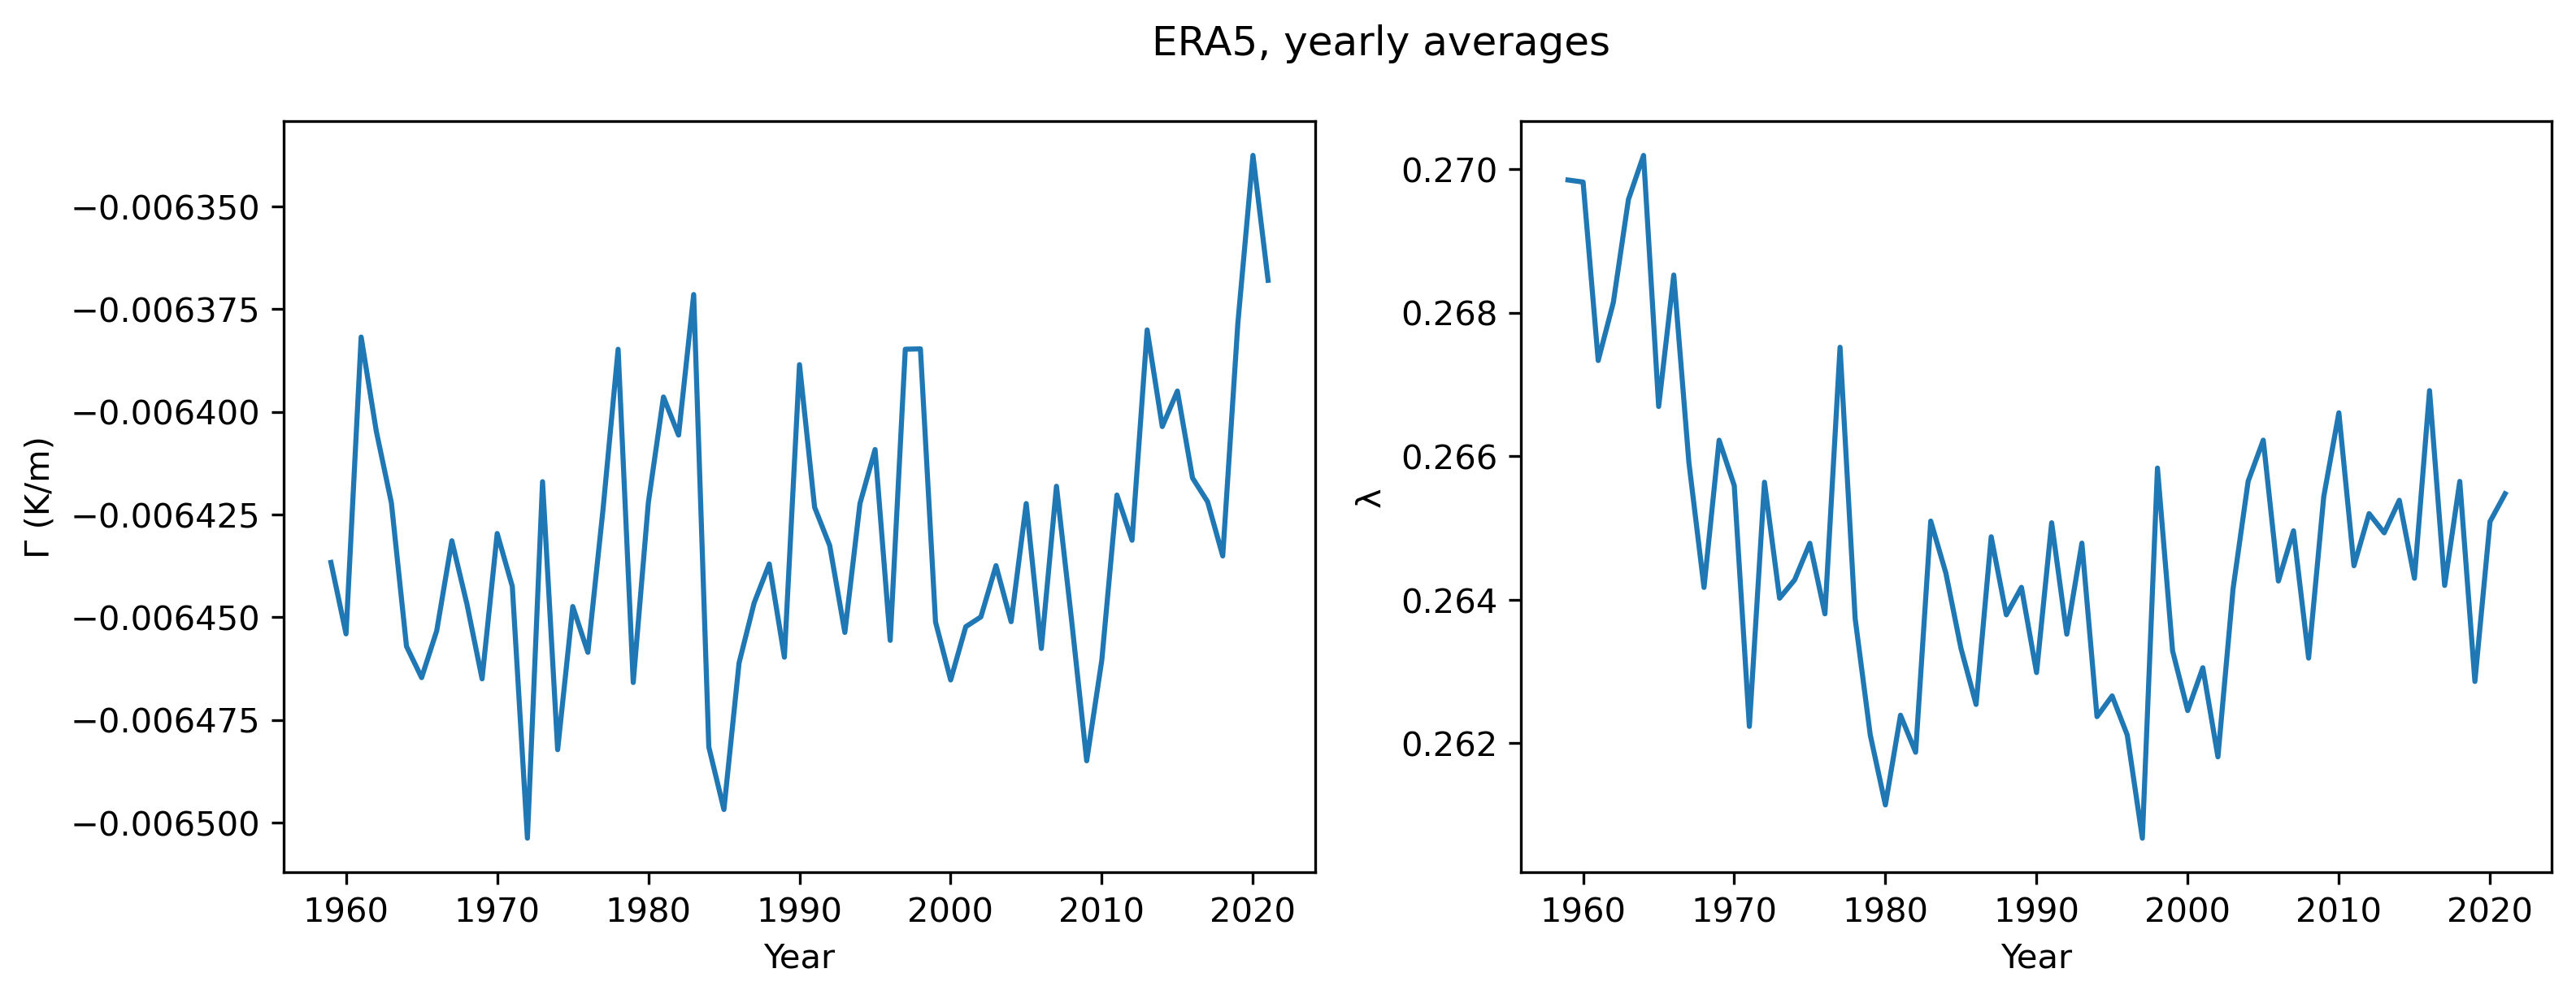

In [13]:
plt.rcParams['figure.figsize'] = [12,4]
plt.subplot(1,2,1)
plt.plot(X, ygamma)
plt.ylabel('\u0393 (K/m)')
plt.xlabel('Year')

plt.subplot(1,2,2)
plt.plot(X, ylambda)
plt.ylabel('\u03BB')
plt.xlabel('Year')

plt.suptitle('ERA5, yearly averages')

Text(0.5, 1.0, 'ERA5, yearly averages')

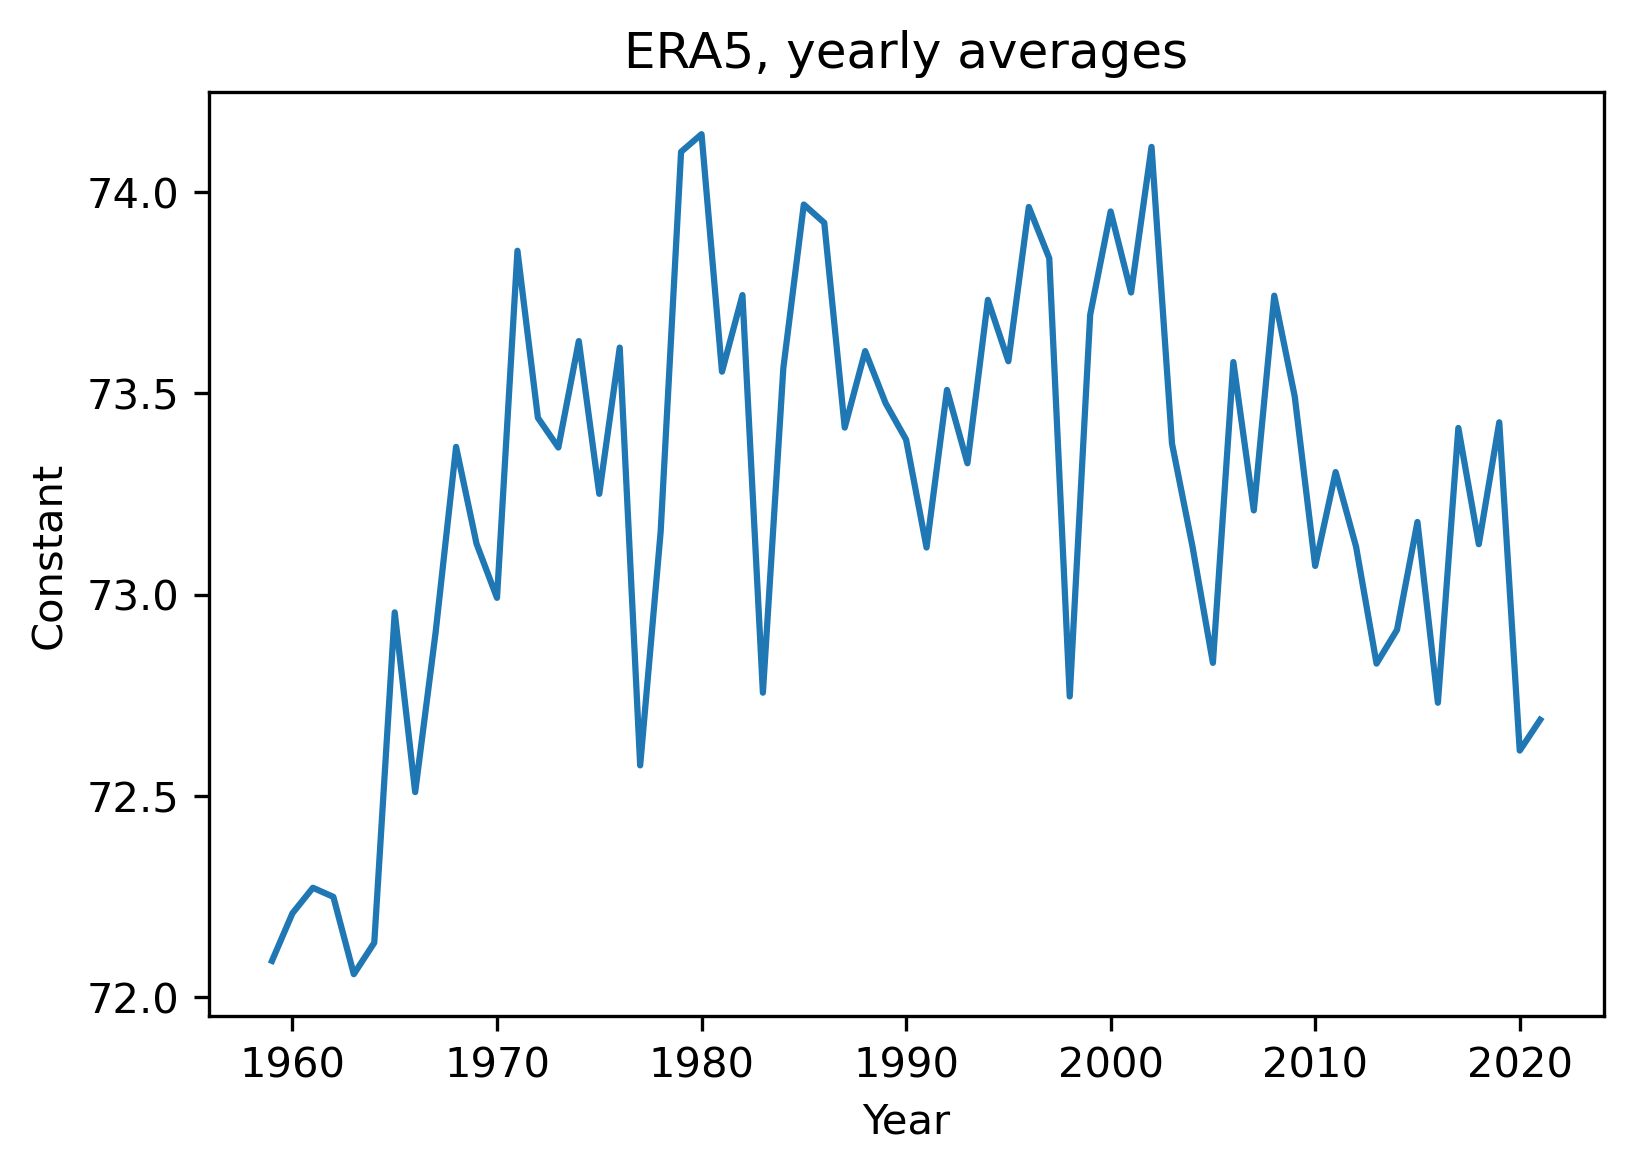

In [14]:
plt.rcParams['figure.figsize'] = [6,4]
plt.plot(X, yconst)
plt.ylabel('Constant')
plt.xlabel('Year')
plt.title('ERA5, yearly averages')

In [15]:
x2, y2 = Pwatint, del1

def objective2(x, c):
	return c/x

p0=73.245
popt2, _ = curve_fit(objective2, x2, y2, p0)
c2 = popt2

print('y = %.5f /Pwat' % (c2)) 

x_line = np.linspace(np.min(x2), np.max(x2), 100)
y_line2 = objective2(x_line,c2)

y = 73.24500 /Pwat


/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


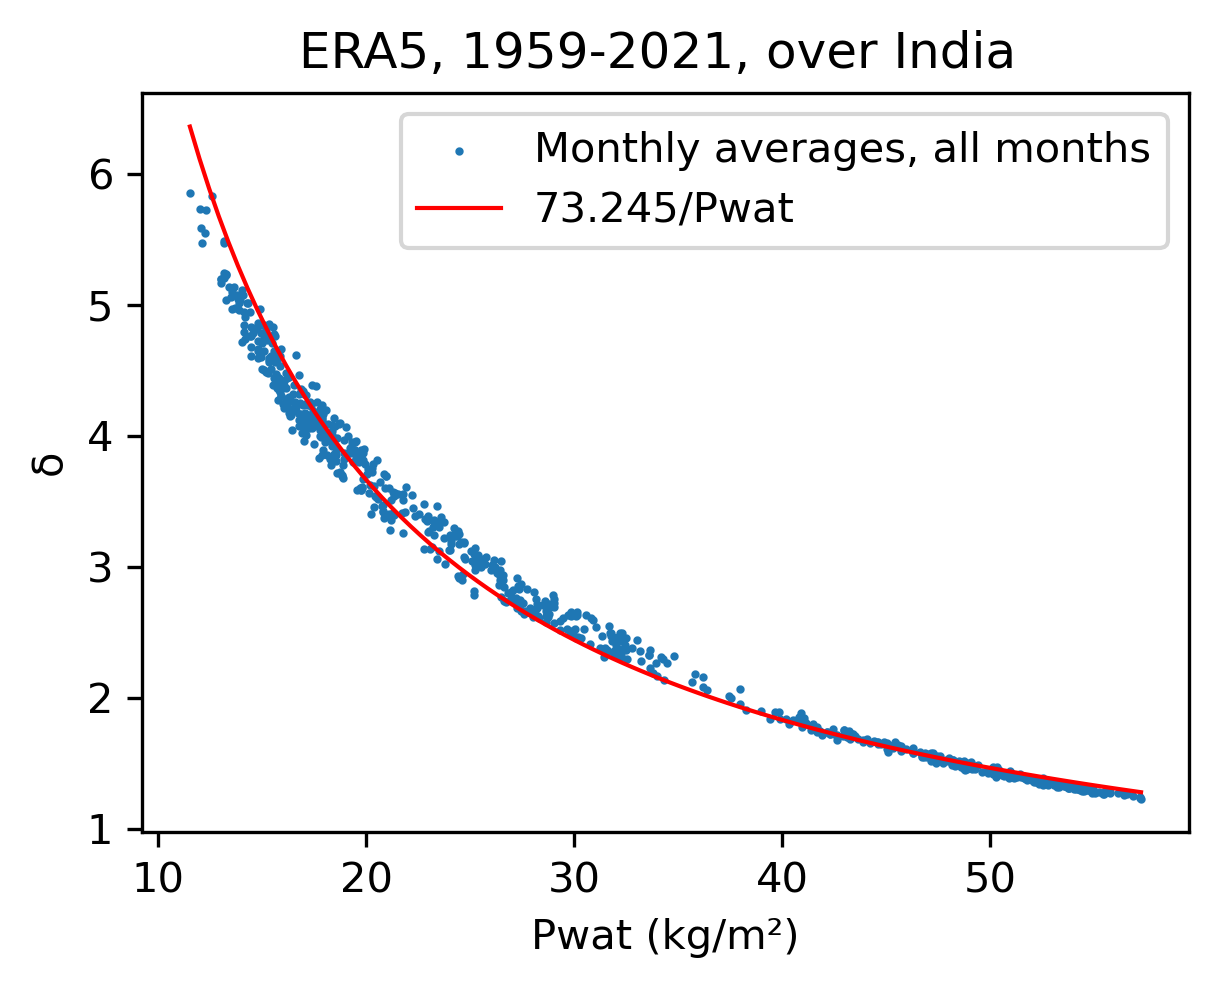

In [16]:
plt.rcParams['figure.figsize'] = [4.5,3.2]
plt.scatter(Pwatint, del1, s=1, label='Monthly averages, all months')
plt.plot(x_line, y_line2, color='red', linewidth=1, label = "73.245/Pwat")
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('\u03B4')
plt.title('ERA5, 1959-2021, over India ')
plt.legend()

In [339]:
X = np.arange(1,757)

Text(0, 0.5, 'Lapse rate')

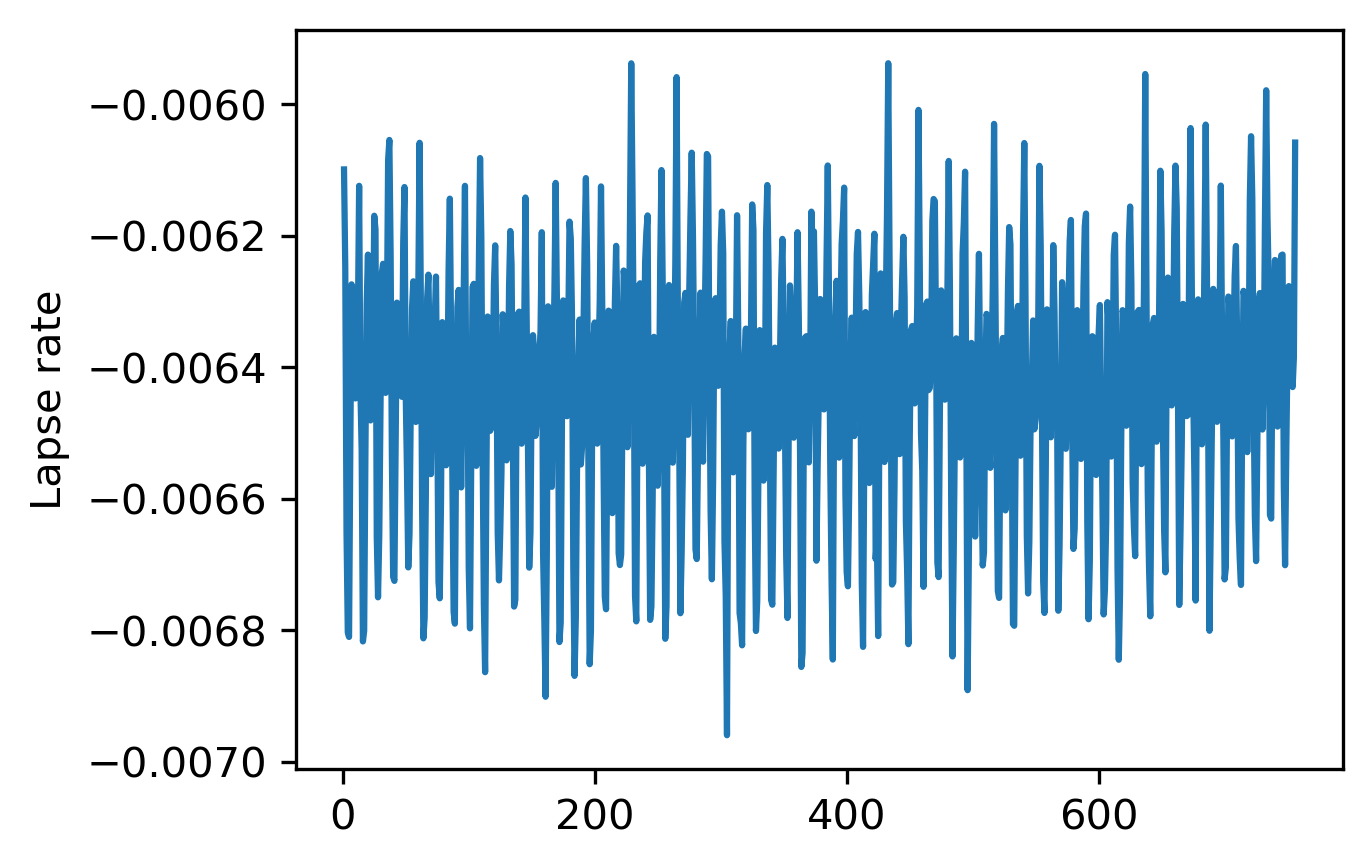

In [340]:
plt.plot(X, gammalist)
plt.ylabel('Lapse rate')

Text(0, 0.5, 'Lambda')

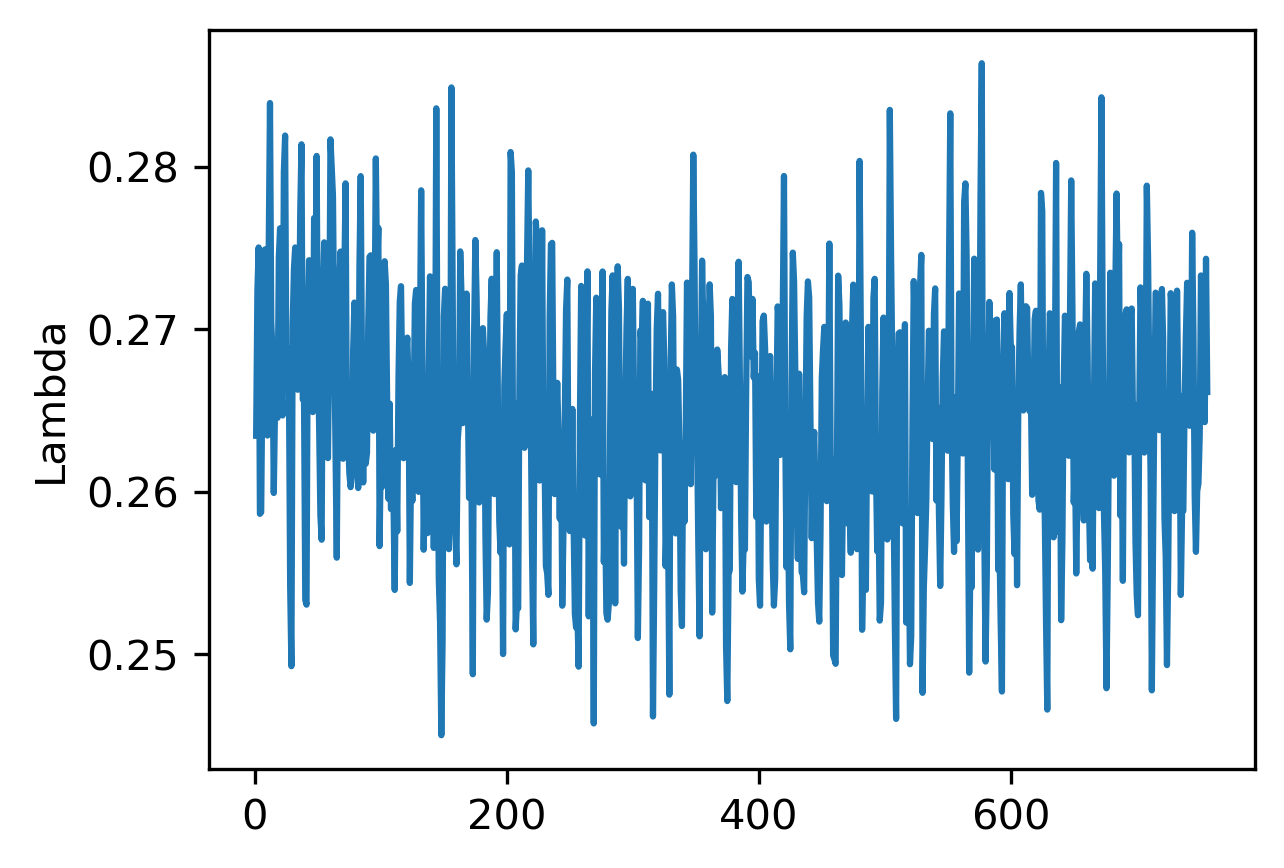

In [341]:
plt.plot(X, lambdalist)
plt.ylabel('Lambda')

In [42]:
#exlambda, exgamma = 0.26345697, -0.006099203
#exlambda, exgamma = lambda1, gamma1
print(exlambda, exgamma)
exlambda, exgamma = np.average(lambdalist), np.average(gammalist)


0.26345697 -0.006099203


In [43]:
p0=100000
l=exlambda
a=g/(Cp*exgamma)
b=R*exgamma/g
T0=300 #remove this later

num = p0*(a-1)*b*(l+2)*Cp*T0
den = Lv*g*l*(b+1)*(b+2)
delog = num/den
print(delog)

72.98391608565585


In [44]:
#variying lambda
#list1 = np.arange(0.1, 0.5, 0.01)
list1 = np.linspace(min(lambdalist), max(lambdalist), 50)
dellam=[]
delc1=[]
for j in list1:
    l=j
    dellam.append(j-exlambda)
    a=g/(Cp*exgamma)
    b=R*exgamma/g
    T0=300 #remove this later 
    num = p0*(a-1)*b*(l+2)*Cp*T0
    den = Lv*g*l*(b+1)*(b+2)
    del1 = num/den
    delc1.append(del1-constref)
    
#variying gamma
#list2 = np.arange(0.1, 0.5, 0.01)
list2 = np.linspace(min(gammalist), max(gammalist), 50)
delgam=[]
delc2=[]
for j in list2:
    l=exlambda
    a=g/(Cp*j)
    b=R*j/g
    delgam.append(j-exgamma)
    T0=300 #remove this later 
    num = p0*(a-1)*b*(l+2)*Cp*T0
    den = Lv*g*l*(b+1)*(b+2)
    del1 = num/den
    delc2.append(del1-constref)

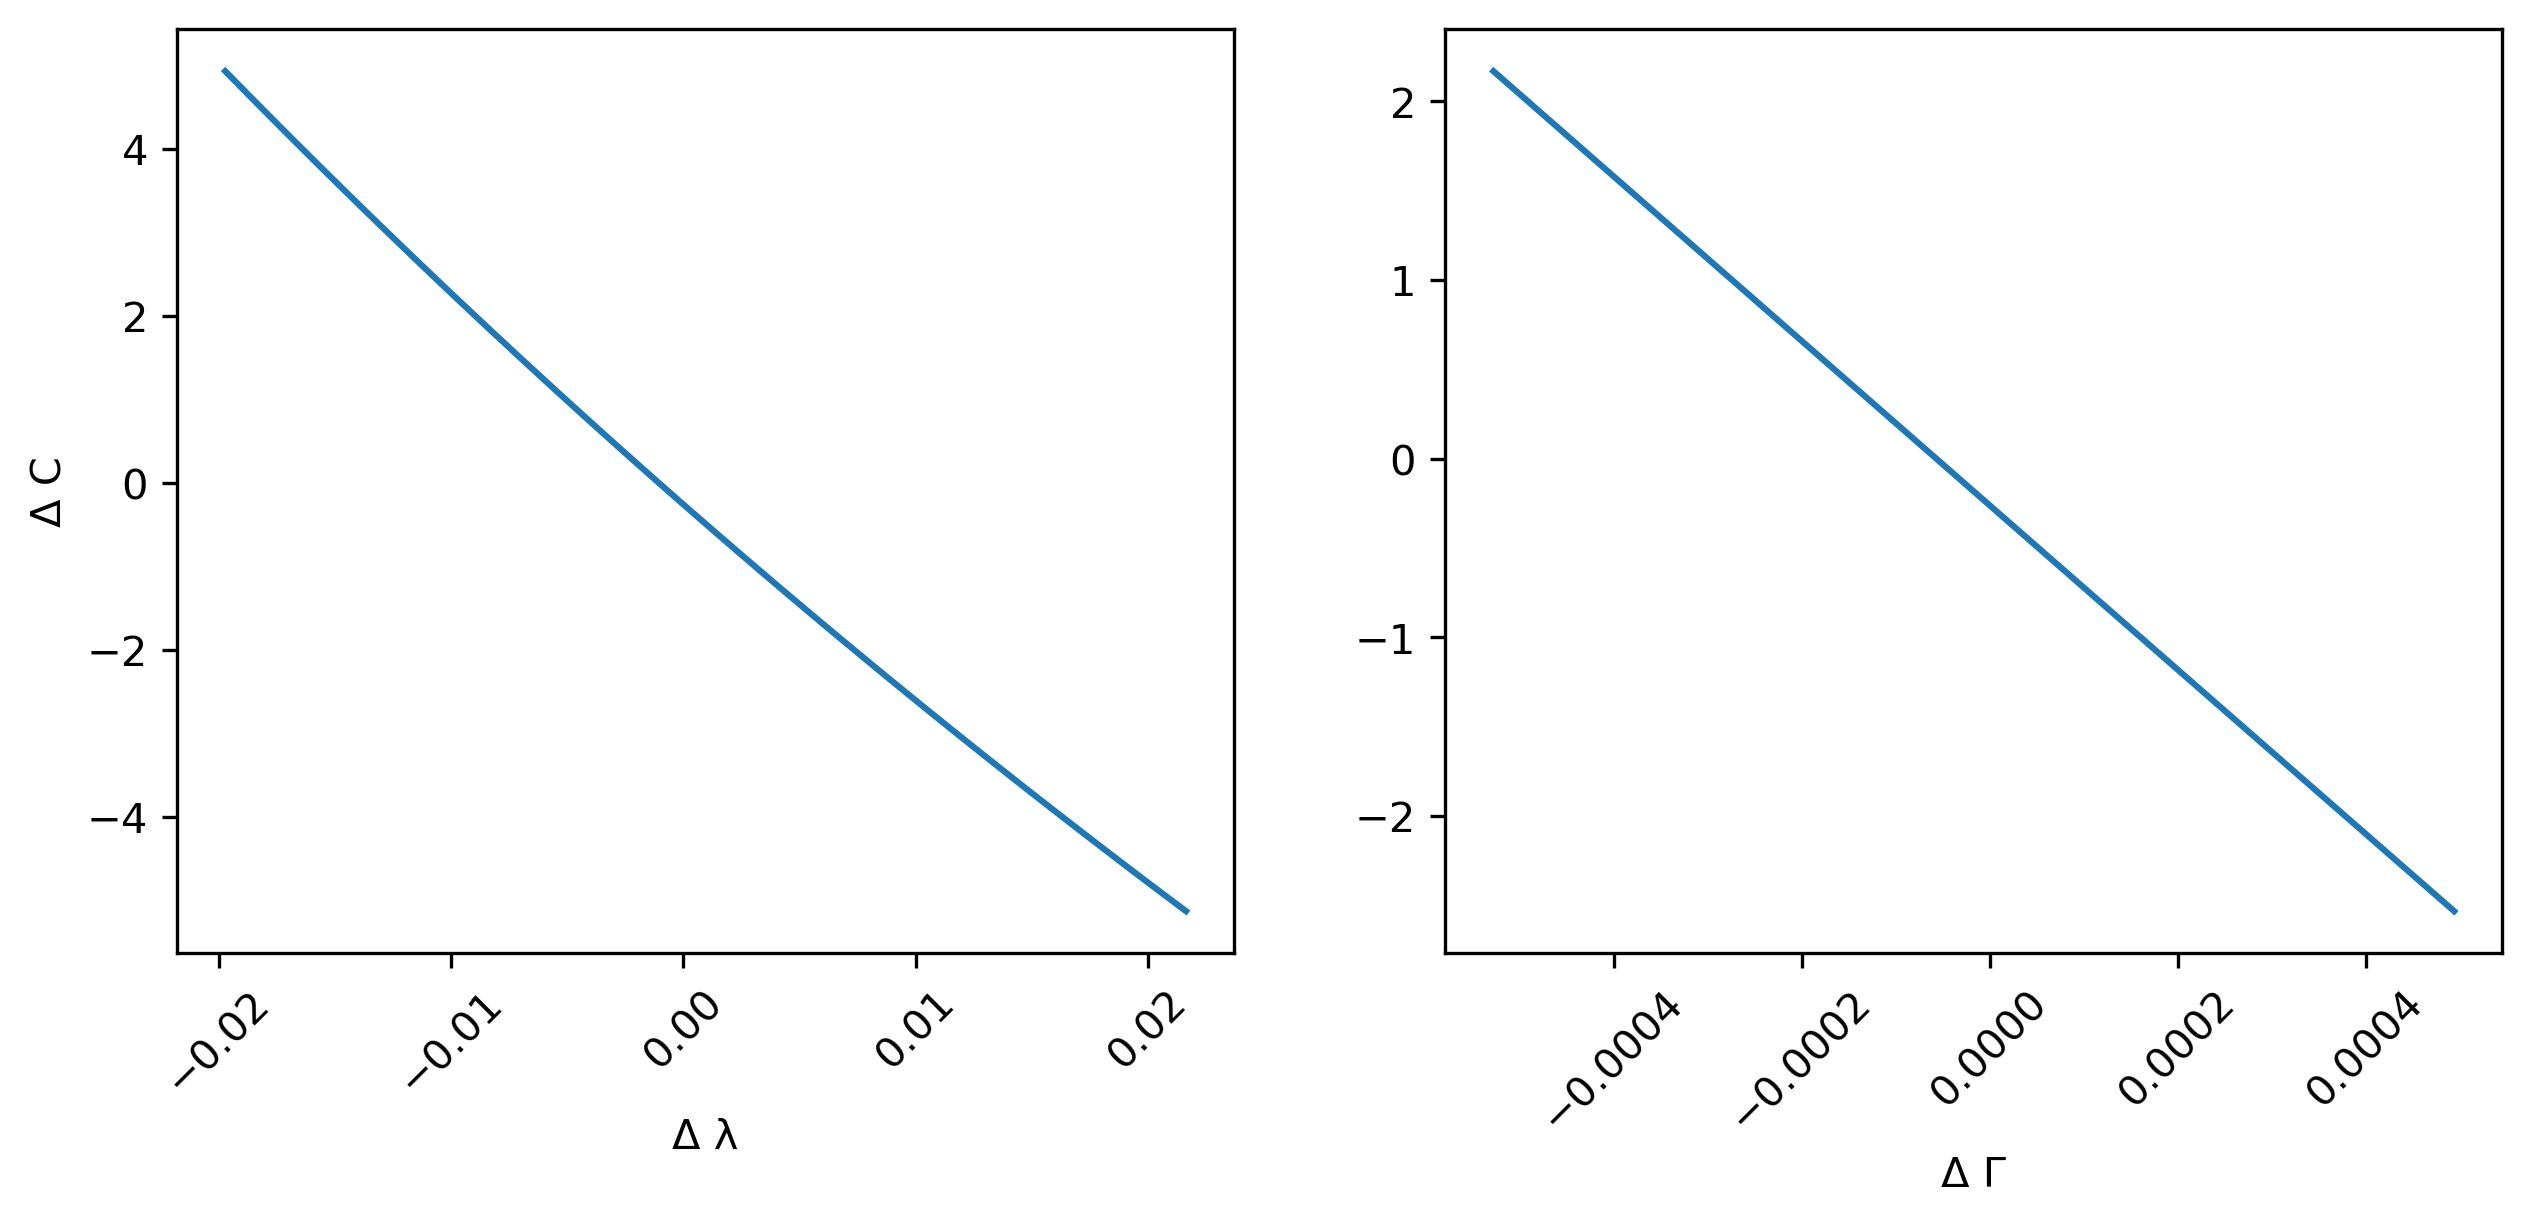

In [45]:
plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.plot(dellam, delc1)
plt.ylabel(u'\u0394 C')
plt.xlabel(u'\u0394 \u03BB')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.plot(delgam, delc2)
plt.xlabel(u'\u0394 \u0393')
plt.xticks(rotation=45)
plt.show()

In [48]:
p0=100000
l=exlambda
a=g/(Cp*exgamma)
b=R*exgamma/g
T0=300 #remove this later

num = p0*(a-1)*b*(l+2)*(b+7)*Cp*T0
den = Lv*g*l*(b+1)*(b+2)*(l+7)
delog = num/den
print(delog)

70.26920340959708


In [8]:
#C = 70.41357
C = 72.423

In [9]:
clim0 = ds.sel(time=slice('1986', '1988'))
clim = clim0.where(mask1>0).mean(dim=['latitude', 'longitude'])
Pwat = clim.tcwv
E = -86400*28.96*clim.mer
P = 86400*(clim.mtpr)#+clim.mer)
Qdiv = clim.mtnswrf + clim.mtnlwrf + clim.mslhf + clim.msshf + clim.msnswrf + clim.msnlwrf

In [10]:
Pcal = (E+Qdiv/((C/Pwat)-1))/28.96

In [11]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(P, Pcal, squared=False)
print(rmse)

1.350057505845061


Text(0.2, 0.8, 'RMSE = 1.35 mm/day')

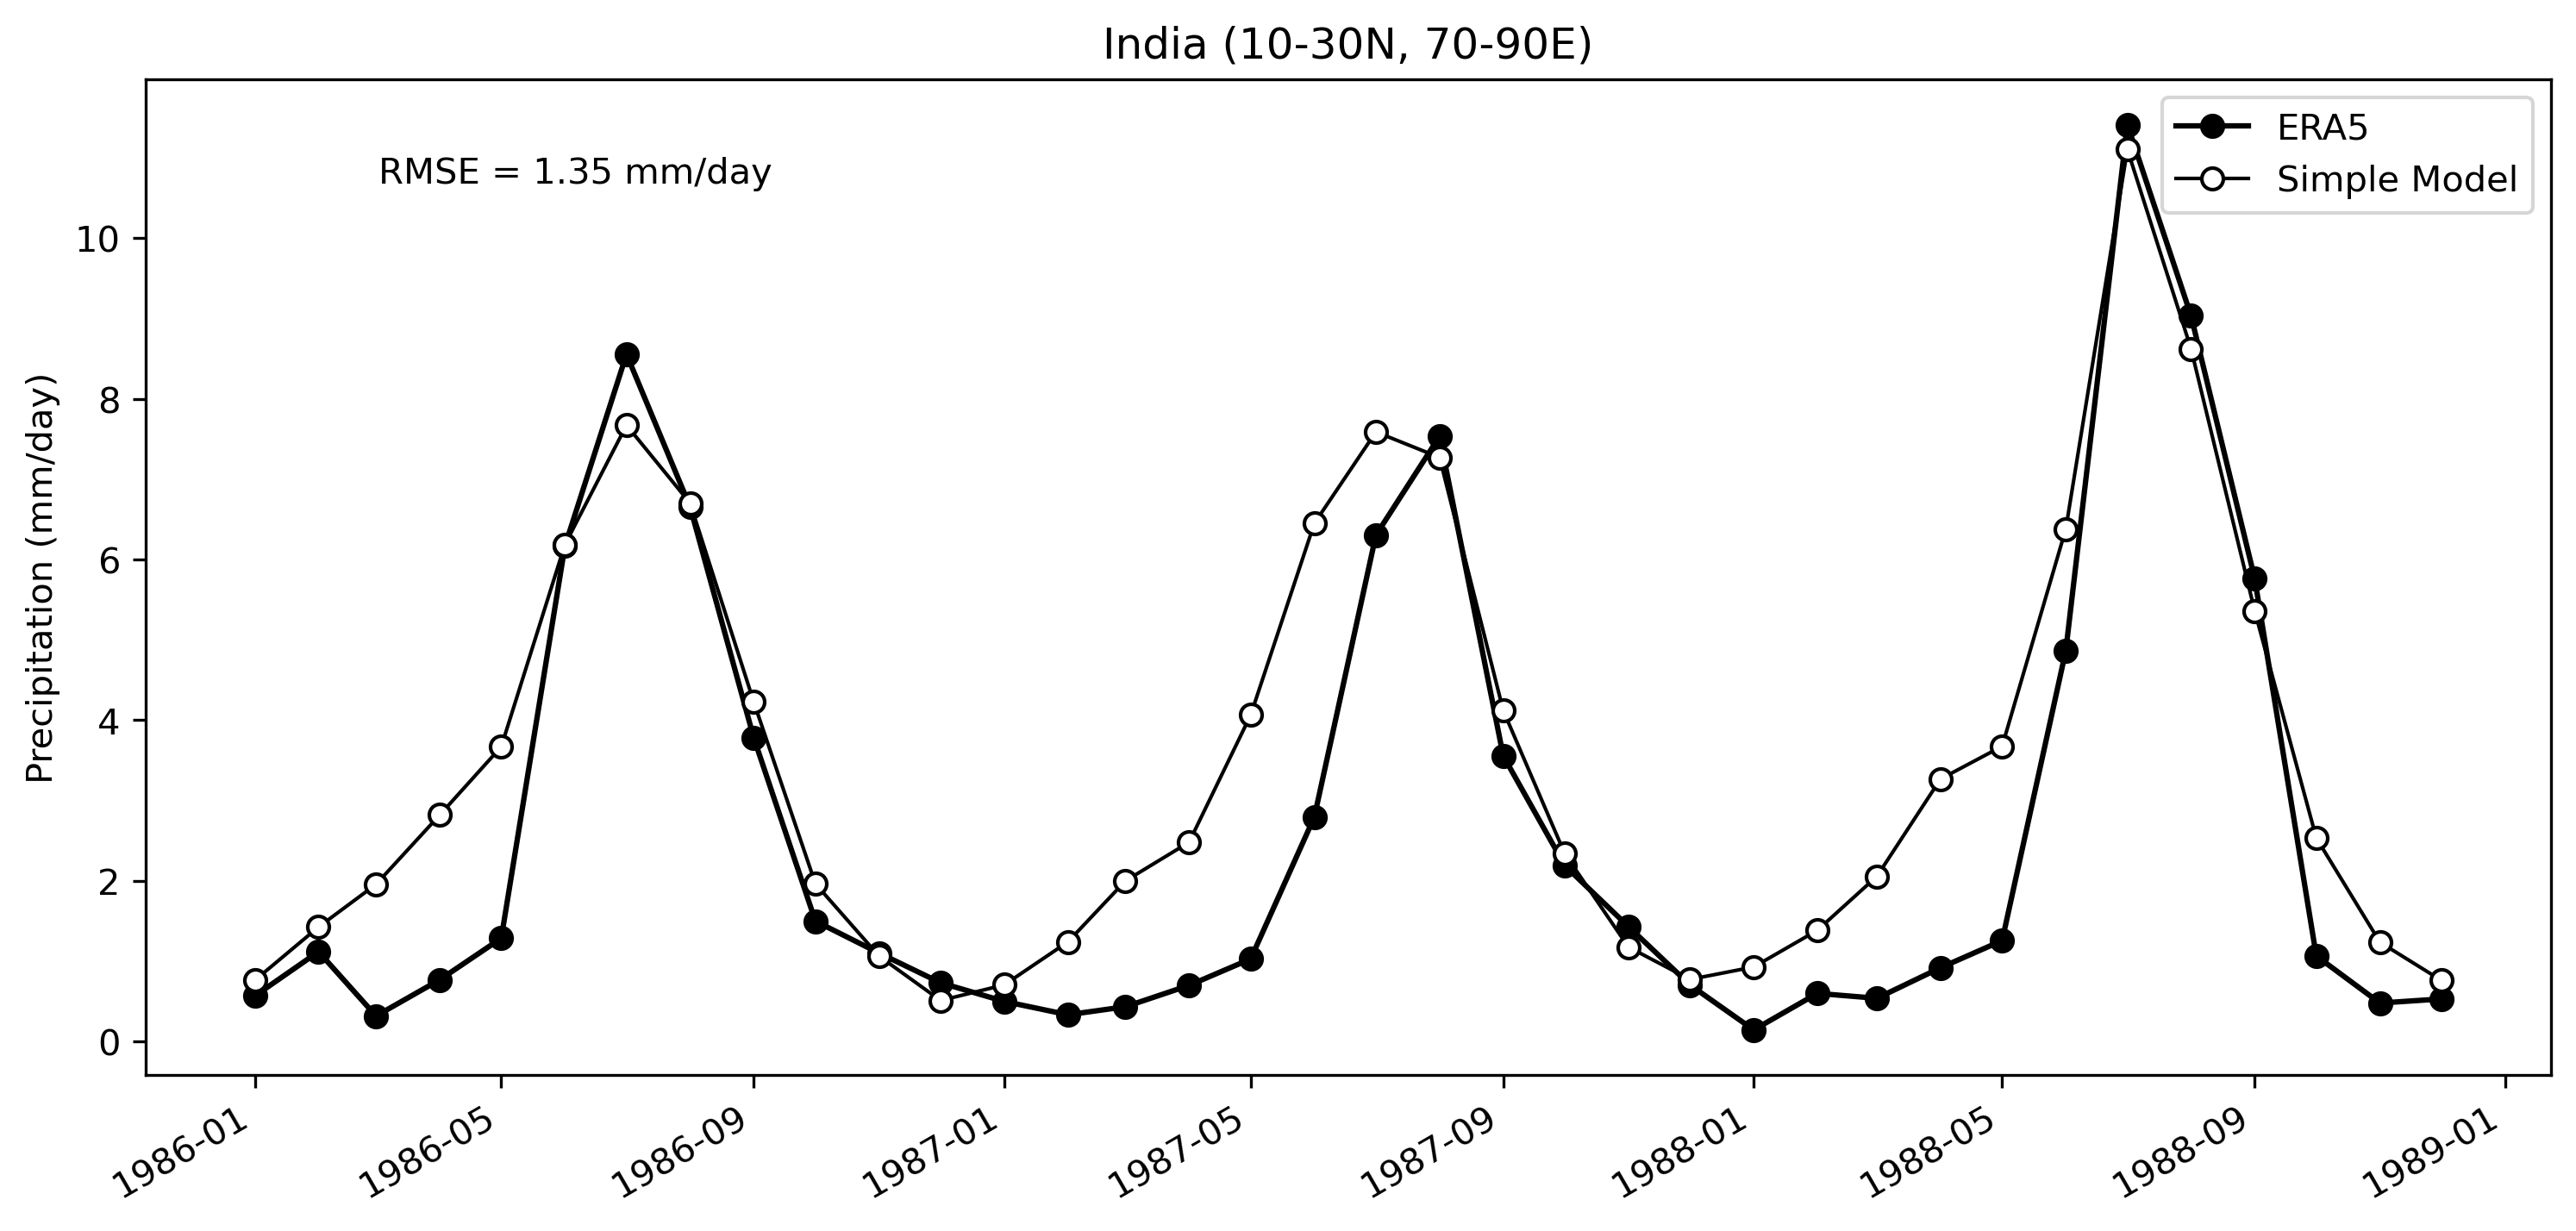

In [12]:
plt.rcParams['figure.figsize'] = [12,5]
P.plot(c='black', marker='o', label='ERA5')
Pcal.plot(c='black', marker='o', markerfacecolor='white', linewidth=1, label='Simple Model')
plt.xlabel('')
plt.ylabel('Precipitation (mm/day)')
plt.legend()
plt.title('India (10-30N, 70-90E)')
plt.figtext(0.2, 0.8, 'RMSE = %.2f mm/day' %(rmse))